## **Problema 8-Rainhas - Algoritmo Hill Climbing**

In [ ]:
import random
from random import shuffle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#board graphic based on the solution
def board(solution): 
    matrix = np.zeros([len(solution),len(solution)], dtype=int)
    matrix = matrix.tolist()
    for item in solution:
        for i in range(len(solution)):
            if i == item:
                for j in range(len(solution)):
                    if  j == solution.index(item):
                        matrix[i][j] = 1
                        
    l =[]
    for i in range(1, len(solution)+1):
        l.append(i)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix, linewidths=.8,cbar=False,cmap='Set3',xticklabels=l,yticklabels=l)
   

In [ ]:
#number of attacks
def evaluation(state):
    h = 0                
    #check for diagonal attacks
    for i in range(0, len(state)):
        for j in range(0, len(state)):
            if j > i:
               if abs(i - j) == abs(state[i] - state[j]):
                  h += 1
                  #Evaluate each column for detecting attacks
               if abs(state[i] - state[j]) == 0:
                  h += 1 
    return h
    
def neighbor(state): #returns the best neighbor
    # Dictionary with all possible solution for each queen
    neighbors = {}
    #print(self.state)
    for i in range(0, len(state)):
        #print(i)
        for j in range(0, len(state)):
            #print("%d %d" % (i,j))
            if j != state[i]:
                 temp = state.copy()                 
                 temp[i] = j
                 #print(temp)
                 #Generate a new solution list (state)                 
                 #Evaluate the number of attacks (heuristic) for each new state
                 neighbors[(i, j)] = evaluation(temp) #list of neighbors' evaluation value
        
    best_neighbors = {} #Store the best heuristic
    best_h = evaluation(state) #assign current state evaluation to the best evaluation
        
    #Iterate dict itens (i,j)
    # Where i is the key and h the value (number of attacks)
    for i, h in neighbors.items():
        #check if there is a better state than the current state
        if h < best_h: 
           best_h = h
           if len(best_neighbors) > 0:
              # reset the dictionary if a better h is found
              best_neighbors.clear()
           best_neighbors[i] = best_h
        if h == best_h:                
           best_neighbors[i] = best_h

    #if there are more than one better solution then choose one of them randomly
    # It is also possible to choose in a greedy way
    if len(best_neighbors.keys()) > 0: 
       random_index = random.randint(0, len(best_neighbors.keys()) - 1)
       list_neighbors = list(best_neighbors.keys())
       state[list_neighbors[random_index][0]] = list_neighbors[random_index][1]

    return state 

In [ ]:
#Hill Climbing Procedure
def hill_climbing(state):
    #print("Before: %d" % evaluation(state))
    #print(state)
    while True:
        best_neighbor = neighbor(state)        
        if evaluation(best_neighbor) >= evaluation(state):
            #print("After: %d" % evaluation(state))
            #print(state)
            return state
        state = best_neighbor       
        
    #print("After: %d" % evaluation(state))
    #print(state)    
    return state

def random_restart(state):    
    count = 0
    while evaluation(state) > 0 & count < 15:
        #Shuffle the solution (generate a new state)
        shuffle(state)
        state = hill_climbing(state)
        count += 1        
    return state

def simple_hill_climbing(state):
    count = 0
    while evaluation(state) > 0 & count < 5:        
        state = hill_climbing(state)        
        count += 1        
    return state

In [ ]:
def sa(alpha, SAmax, state, t0):
    IterT = 0
    current_state = state
    current_eval = evaluation(current_state)
    while t0 > 0.0001:
      while IterT < SAmax:
        IterT += 1
        neighbor_state = neighbor(current_state)
        neighbor_eval = evaluation(neighbor_state)
        # calculando a diferença de energia
        delta = neighbor_eval - current_eval
        # calculando a probabilidade de aceitacao utilizando o algoritmo de Metropolis
        probabilidade_de_aceitacao = np.exp(delta / t0)
        # aceita o estado por chance ou pelo delta ser negativo, significando que a solução é melhor
        if random.random() < probabilidade_de_aceitacao or delta < 0:
            current_state = neighbor_state
            current_eval = neighbor_eval
      # resfriando
      t0 *= alpha
      IterT = 0      
    return current_state

In [ ]:
#Exemplo de solução inicial
tabuleiro = [1,2,3,5,4,7,6,0]
print(tabuleiro)
shuffle(tabuleiro)
print("Quantidade de ataques: %d" % evaluation(tabuleiro))
new_state = neighbor(tabuleiro)
print("Quantidade de ataques: %d" % evaluation(new_state))
print(new_state)

[1, 2, 3, 5, 4, 7, 6, 0]
Quantidade de ataques: 5
Quantidade de ataques: 3
[5, 1, 6, 4, 0, 3, 0, 7]


Estado inicial: [7, 6, 7, 6, 2, 1, 7, 1]
Solução Final:  [5, 3, 6, 0, 7, 1, 4, 2]  - ataques:  0


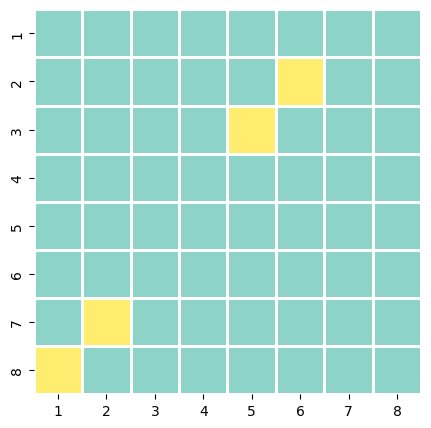

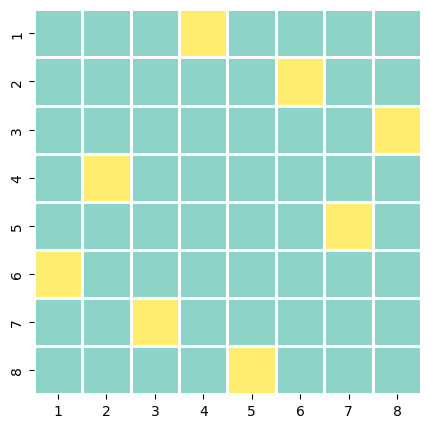

In [ ]:
state = [random.randint(0,7) for i in range(8)]
print("Estado inicial:", state)
board(state)
solution = simple_hill_climbing(state)
print("Solução Final: ",solution," - ataques: ",evaluation(solution))
board(solution)


Estado inicial: [0, 1, 4, 2, 5, 0, 6, 3]
Solução Final:  [3, 6, 4, 1, 5, 0, 2, 7]  - ataques:  0


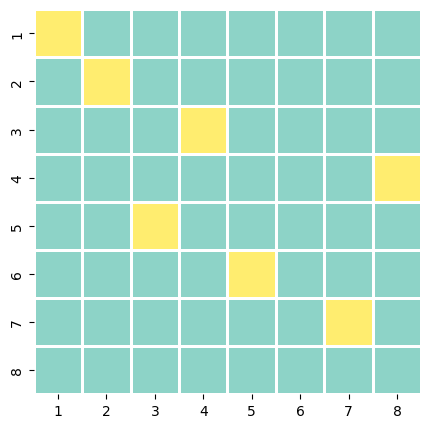

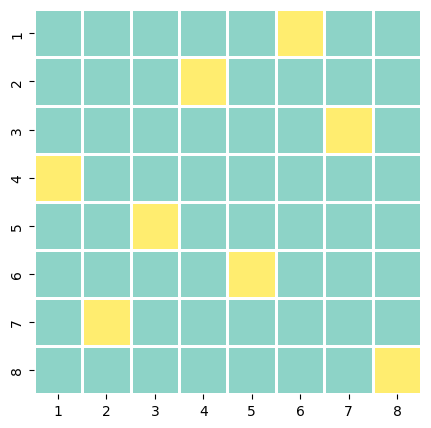

In [ ]:
state = [random.randint(0,7) for i in range(8)]
print("Estado inicial:", state)
board(state)
t0 = 10
alpha = 0.1
SAmax = 8 * 8
solution = sa(alpha, SAmax, state, t0)
print("Solução Final: ",solution," - ataques: ",evaluation(solution))
board(solution)